# Markovova nerovnost
## (Čebyševova nerovnost 1. typu)

Pro libovolnou nezápornou náhodnou veličnu $X$ s konečnou střední hodnotou $E(x)$ platí, že pravděpodobnost, že $X$ přesáhne hranici $\epsilon > 0$ je:

$$ P(X \ge \epsilon) \le \frac{E(x)}{\epsilon}$$

V první simulaci se zaměříme na Poissonovo rozdělení, definované jediným parametrem $\lambda$.




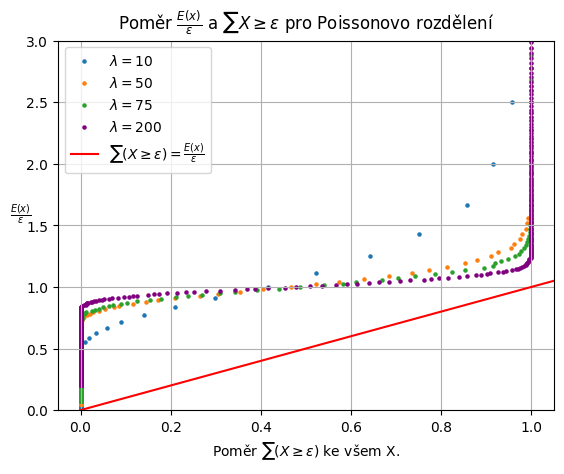

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

n = 1000

lmbd_1 = 10
poisson_l_1 = np.random.poisson(lmbd_1, size=n)
smaller_than_epsilon_l_1 = []
expected_to_epsilon_l_1 = []

lmbd_2 = 50
poisson_l_2 = np.random.poisson(lmbd_2, size=n)
smaller_than_epsilon_l_2 = []
expected_to_epsilon_l_2 = []

lmbd_3 = 75
poisson_l_3 = np.random.poisson(lmbd_3, size=n)
smaller_than_epsilon_l_3 = []
expected_to_epsilon_l_3 = []

lmbd_4 = 200
poisson_l_4 = np.random.poisson(lmbd_4, size=n)
smaller_than_epsilon_l_4 = []
expected_to_epsilon_l_4 = []

for epsilon in range(1,n + 1):
  smaller_than_epsilon_l_1.append((sum(poisson_l_1 > epsilon)) / n)
  #Střední hodnota pro poissonovo rozdělení je lambda
  expected_to_epsilon_l_1.append(lmbd_1 / epsilon)

  #To samé opakujeme pro ostatní velikosti lambdy
  smaller_than_epsilon_l_2.append((sum(poisson_l_2 > epsilon)) / n)
  expected_to_epsilon_l_2.append(lmbd_2 / epsilon)

  smaller_than_epsilon_l_4.append((sum(poisson_l_4 > epsilon)) / n)
  expected_to_epsilon_l_4.append(lmbd_4 / epsilon)

  smaller_than_epsilon_l_3.append((sum(poisson_l_3 > epsilon)) / n)
  expected_to_epsilon_l_3.append(lmbd_3 / epsilon)

plt.scatter(smaller_than_epsilon_l_1, expected_to_epsilon_l_1, label=r'$\lambda = 10$', s=5)
plt.scatter(smaller_than_epsilon_l_2, expected_to_epsilon_l_2, label=r'$\lambda = 50$', s=5)
plt.scatter(smaller_than_epsilon_l_3, expected_to_epsilon_l_3, label=r'$\lambda = 75$', s=5)
plt.scatter(smaller_than_epsilon_l_4, expected_to_epsilon_l_4, label=r'$\lambda = 200$', s=5, color="purple")

plt.title(r'Poměr $ \frac{E(x)}{\epsilon} $ a $\sum_ X \geq \epsilon$ pro Poissonovo rozdělení')
plt.ylabel(r'$ \frac{E(x)}{\epsilon} $',  rotation=0)
plt.xlabel("Poměr " + r'$\sum_ (X \geq \epsilon )$' + " ke všem X.")
plt.axline((0, 0), slope=1, color="red", label=r'$\sum_ ( X \geq \epsilon )= \frac{E(x)}{\epsilon}$')
plt.legend()
plt.ylim((0, 3))
plt.grid()
plt.show()


## Graf 1.
Z výše uvedené simulace je patrné, že pro zvětšující se $\lambda$ má konvexní část kubické poaraboly tendenci přiblížení k hraničnímu stavu, za kterým by byla Markovova nerovnost porušena. Toto přiblížení je limitní a se zvětšujícím lambda se tato vzdálenost blíží k 0.
Kromě Poissonova rozdělení můžeme tuto simulaci porvést i pro jiné rozdělení.

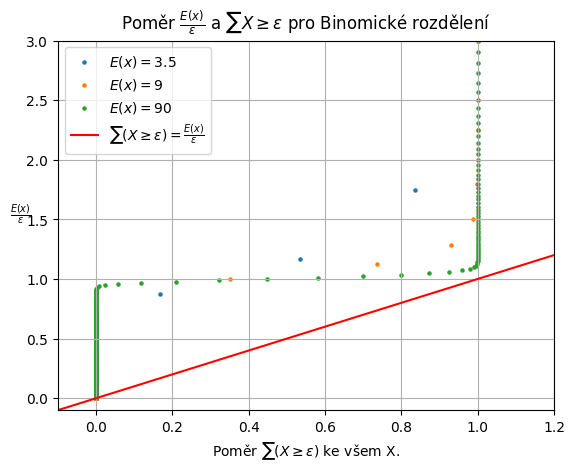

In [20]:
plt.clf()
n = 10000

bin_n_1 = 5
bin_p_1 = 0.7
binomial_values_1 = np.random.binomial(bin_n_1, bin_p_1, size=n)
smaller_than_epsilon_1 = []
expected_to_epsilon_1 = []

bin_n_2 = 10
bin_p_2 = 0.9
binomial_values_2 = np.random.binomial(bin_n_2, bin_p_2, size=n)
smaller_than_epsilon_2 = []
expected_to_epsilon_2 = []

bin_n_3 = 100
bin_p_3 = 0.9
binomial_values_3 = np.random.binomial(bin_n_3, bin_p_3, size=n)
smaller_than_epsilon_3 = []
expected_to_epsilon_3 = []

for epsilon in range(1, n + 1):
  smaller_than_epsilon_1.append(np.sum(binomial_values_1 > epsilon) / n)
  #Využíváme vztahu, že střední hodnota binomického rozdělení je n*p
  expected_to_epsilon_1.append((bin_n_1*bin_p_1) / epsilon)

  #Stejně jako minule vše opakujeme i pro ostatní hodnoty n*p
  smaller_than_epsilon_2.append(np.sum(binomial_values_2 > epsilon) / n)
  expected_to_epsilon_2.append((bin_n_2*bin_p_2) / epsilon)

  smaller_than_epsilon_3.append(np.sum(binomial_values_3 > epsilon) / n)
  expected_to_epsilon_3.append((bin_n_3*bin_p_3) / epsilon)


plt.scatter(smaller_than_epsilon_1, expected_to_epsilon_1, label=r"$E(x)=3.5$",s=5)
plt.scatter(smaller_than_epsilon_2, expected_to_epsilon_2, label=r"$E(x)=9$",s=5)
plt.scatter(smaller_than_epsilon_3, expected_to_epsilon_3, label=r"$E(x)=90$",s=5)


plt.title(r'Poměr $ \frac{E(x)}{\epsilon} $ a $\sum_ X \geq \epsilon$ pro Binomické rozdělení')
plt.ylabel(r'$ \frac{E(x)}{\epsilon} $',  rotation=0)
plt.xlabel("Poměr " + r'$\sum_ (X \geq \epsilon )$' + " ke všem X.")
plt.axline((0, 0), slope=1, color="red", label=r'$\sum_ ( X \geq \epsilon )= \frac{E(x)}{\epsilon}$')
plt.legend()
plt.ylim((-0.1, 3))
plt.xlim((-0.1,1.2))
plt.grid()
plt.show()

## Graf 2.
Z druhého grafu lze vyčíst identický trend chování daných poměrů. Opět se zde formuje kubická parabola, která se ve své konvexní části limitně přibližuje k hranici $\sum_{}{}(X\geq\epsilon )= \frac{E(x)}{\epsilon}$. Podobného chování bychom měli dosáhnout u všech rozdělení náhodné veličiny s konečnou střední hodnotou a rozptylem.